In [1]:
from sklearn.datasets import fetch_openml


In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

c:\Users\pooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
x[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
%matplotlib inline

In [8]:
import matplotlib
import matplotlib.pyplot as plt


In [9]:
import numpy as np

In [10]:
some_digit = x[3600]
some_digit_image = some_digit.reshape(28, 28)


(-0.5, 27.5, 27.5, -0.5)

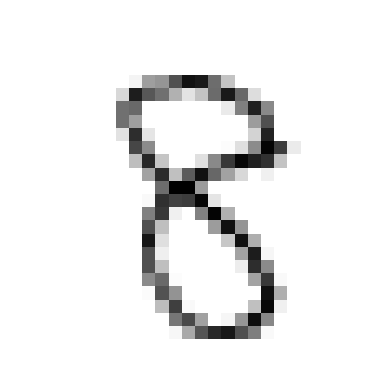

In [11]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis(False)

In [12]:
y[3600]

'8'

In [13]:
x_train, x_test = x[:6000], x[6000:7000]
y_train, y_test = y[:6000], y[6000:7000]


In [14]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

<h2>Create a 2 detector</h2>

In [15]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(tol=0.1)
classifier.fit(x_train, y_train_2)


c:\Users\pooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [17]:
y[3601]

'8'

In [18]:
classifier.predict([x[36001]])

array([ True])

In [19]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(classifier, x_train, y_train_2, cv=3, scoring="accuracy")

c:\Users\pooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [20]:
a.mean()

0.9578333333333333

In [21]:
y_train_not_2 = (y_train != 2)

In [22]:

b = cross_val_score(classifier, x_train,y_train_not_2, cv=3, scoring="accuracy")

c:\Users\pooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [23]:
b.mean()

0.9578333333333333

In [24]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(classifier, x_train, y_train_2, cv=3)


c:\Users\pooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [25]:
y_train_pred

array([False, False, False, ..., False, False, False])

<h1>Calculate Cofusion Matrix</h1>

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2, y_train_pred)

array([[5284,  135],
       [ 118,  463]], dtype=int64)

In [27]:
# if perfect confusion matrix
confusion_matrix(y_train_2, y_train_2)

array([[5419,    0],
       [   0,  581]], dtype=int64)

<h1>precision and Recall </h1>

In [28]:
from sklearn.metrics import precision_score, recall_score


In [29]:
precision_score(y_train_2, y_train_pred)

0.774247491638796

In [30]:
recall_score(y_train_2, y_train_pred)

0.7969018932874354

<h3>F1- score </h3>

In [31]:
from sklearn.metrics import f1_score
f1_score(y_train_2, y_train_pred)

0.7854113655640373

<h1>precision recall curve</h1>

In [32]:
from sklearn.metrics import precision_recall_curve

In [33]:
y_scores = cross_val_predict(classifier, x_train, y_train_2, cv=3, method='decision_function')

c:\Users\pooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [34]:

precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [35]:
precisions

array([0.09683333, 0.09684947, 0.09686562, ..., 1.        , 1.        ,
       1.        ])

In [36]:
recalls

array([1.        , 1.        , 1.        , ..., 0.00344234, 0.00172117,
       0.        ])

In [37]:
thresholds

array([-527.55775492, -508.01994767, -499.15301782, ...,  189.26060718,
        193.26683269,  210.8617862 ])

<h3>Precision Recall curve</h3>

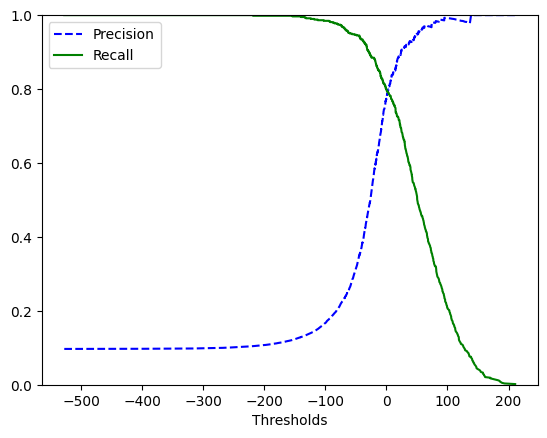

In [39]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()